In [293]:
# 1. Use web scraping to get the top 150 NBA Fantasy player on "rotowire.com"
# Top 150 NBA Fantasy Draft Ranks in 2023/24
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage
url = "https://www.rotowire.com/basketball/article/fantasy-basketball-rankings-2023-24-early-top-150-nba-fantasy-draft-ranks-72985"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find all <a> elements within <li> elements
a_elements = soup.select(".article__body ol li a")

# Extract player names and team information
player_names_set = set()  # To keep track of added player names
player_info = []

for a in a_elements:
    player_name = a.get_text(strip=True)
    if player_name not in player_names_set:
        player_info.append(player_name)
        player_names_set.add(player_name)

# Add a new column "Range" indicating the position of the player
player_range = list(range(1, len(player_info) + 1))

# Create a DataFrame from player names and range
data = {'Range': player_range, 'Player Name': player_info}
df_Player_Range = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_filename = 'player_range.csv'
df_Player_Range.to_csv(csv_filename, index=False)

print(df_Player_Range)


     Range              Player Name
0        1             Nikola Jokic
1        2              Joel Embiid
2        3  Shai Gilgeous-Alexander
3        4              Luka Doncic
4        5             Jayson Tatum
..     ...                      ...
146    147             Cam Whitmore
147    148             Monte Morris
148    149           Christian Wood
149    150              Kelly Oubre
150    151          P.J. Washington

[151 rows x 2 columns]


In [295]:
# 2. Use web scraping to get the NBA player information on "basketball.realgm.com"
# NBA player information in deatil
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://basketball.realgm.com/nba/players"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
player_data = []

# Find the table that contains the player data
table = soup.find('table', class_='tablesaw')

# Iterate through each row of the table
for row in table.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) >= 10:  # Ensure the row has at least five cells (Player, Team, etc.)
        team_number = cells[0].text.strip()
        player_name = cells[1].text.strip()
        position = cells[2].text.strip()
        height = cells[3].text.strip()
        weight = cells[4].text.strip()
        current_team = cells[6].text.strip()
        player_data.append((team_number, player_name, position, height, weight, current_team))

# Create a DataFrame from the extracted data
columns = ['Team Number', 'Player Name', 'Position', 'Height', 'Weight', 'Team' ]
df_PlayerDetail = pd.DataFrame(player_data, columns=columns)


csv_filename = 'player_information.csv'
df_PlayerDetail.to_csv(csv_filename, index=False)

# Display the DataFrame
print(df_PlayerDetail)


    Team Number       Player Name Position Height Weight                  Team
0             5  Precious Achiuwa       SF    6-8    244       Toronto Raptors
1             4      Steven Adams        C   6-11    265     Memphis Grizzlies
2            13       Bam Adebayo        C   6-10    255            Miami Heat
3            30      Ochai Agbaji       SF    6-5    215             Utah Jazz
4             7      Santi Aldama        C   6-11    224     Memphis Grizzlies
..          ...               ...      ...    ...    ...                   ...
530          21    Thaddeus Young        F    6-8    235       Toronto Raptors
531          11        Trae Young       PG    6-1    180         Atlanta Hawks
532          77    Omer Yurtseven        C   6-11    255             Utah Jazz
533          44       Cody Zeller        F   6-11    240  New Orleans Pelicans
534          40       Ivica Zubac        C    7-0    240  Los Angeles Clippers

[535 rows x 6 columns]


In [297]:
# 3. Create a new table that include the player informtaion and range
import pandas as pd

# Load the dataframes from their respective CSV files
df_Player_Range = pd.read_csv('player_range.csv')
df_PlayerDetail = pd.read_csv('player_information.csv')

# Perform a left join on 'Player Name'
merged_df = df_Player_Range.merge(df_PlayerDetail, on='Player Name', how='left')

# Create a new dataframe with the desired structure
new_data = {
    'Range': merged_df['Range'],
    'current_team': merged_df['Team'],
    'Player_name': merged_df['Player Name'],
    'team_number': merged_df['Team Number'],
    'position': merged_df['Position']
}
new_df = pd.DataFrame(new_data)

# Save the new dataframe to a CSV file
csv_filename = 'player_information_range.csv'
new_df.to_csv(csv_filename, index=False)

# Display the new dataframe
print(new_df)


     Range           current_team              Player_name  team_number  \
0        1         Denver Nuggets             Nikola Jokic         15.0   
1        2    Philadelphia Sixers              Joel Embiid         21.0   
2        3  Oklahoma City Thunder  Shai Gilgeous-Alexander          2.0   
3        4       Dallas Mavericks              Luka Doncic         77.0   
4        5         Boston Celtics             Jayson Tatum          0.0   
..     ...                    ...                      ...          ...   
146    147        Houston Rockets             Cam Whitmore          7.0   
147    148        Detroit Pistons             Monte Morris          5.0   
148    149                    NaN           Christian Wood          NaN   
149    150                    NaN              Kelly Oubre          NaN   
150    151                    NaN          P.J. Washington          NaN   

    position  
0          C  
1          C  
2         PG  
3         SF  
4         SF  
..       

In [298]:
# 4. Use web scraping to get the NBA team's salary cap on "hoopshype.com"
# NBA Team Salary detail on 2023/24
import requests
from bs4 import BeautifulSoup

url = "https://hoopshype.com/salaries/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

team_data = []

# Find the table that contains the data
table = soup.find('table', class_='hh-salaries-ranking-table')


# Iterate through each row of the table starting from the second row
for row in table.find_all('tr')[1:]:
    cells = row.find_all('td')

    #print (cells)
    if len(cells) >= 2:  # Ensure the row has at least two cells (TEAM and Payroll)
        team_name = cells[1].text.strip()
        payroll = cells[2].text.strip()
        team_data.append((team_name, payroll))

# Create a DataFrame from the extracted data
columns = ['Location_Name', 'Payroll']
df_TeamSalary = pd.DataFrame(team_data, columns=columns)

# Save DataFrame to CSV file
csv_filename = 'team_payrolls.csv'
df_TeamSalary.to_csv(csv_filename, index=False)

print (df_TeamSalary)



    Location_Name       Payroll
0    Golden State  $209,671,207
1     LA Clippers  $195,254,427
2         Phoenix  $189,053,654
3       Milwaukee  $187,321,247
4          Denver  $185,281,681
5           Miami  $184,865,778
6    Philadelphia  $178,540,987
7          Boston  $177,770,356
8         Toronto  $169,719,693
9     New Orleans  $168,130,661
10       New York  $167,613,728
11         Dallas  $167,457,375
12        Chicago  $166,632,965
13      LA Lakers  $165,528,863
14      Minnesota  $164,431,694
15      Cleveland  $164,201,507
16       Portland  $161,070,814
17       Brooklyn  $159,371,724
18        Atlanta  $157,902,123
19        Memphis  $152,730,161
20        Houston  $151,789,416
21     Sacramento  $151,233,805
22  Oklahoma City  $150,317,898
23        Detroit  $141,548,608
24     Washington  $139,218,145
25           Utah  $137,658,645
26    San Antonio  $137,281,719
27        Orlando  $131,524,034
28        Indiana  $130,206,705
29      Charlotte  $115,227,894


In [299]:
# 5. Use web scraping to get the NBA player's salary on "hoopshype.com"
# NBA player Salary detail on 2023/24
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://hoopshype.com/salaries/players/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

player_data = []

# Find the table that contains the data
table = soup.find('table', class_='hh-salaries-ranking-table')

# Iterate through each row of the table
for row in table.find_all('tr')[1:]:
    cells = row.find_all('td')
    if len(cells) >= 2:  # Ensure the row has at least two cells (Player and Salary)
        player_name = cells[1].text.strip()
        salary = cells[2].text.strip()
        player_data.append((player_name, salary))

# Create a DataFrame from the extracted data
columns = ['Player_name', 'Salary in 2023/24']
df_PlayerSalary = pd.DataFrame(player_data, columns=columns)

# Save DataFrame to CSV file
csv_filename = 'player_salaries.csv'
df_PlayerSalary.to_csv(csv_filename, index=False)

print(df_PlayerSalary)


        Player_name Salary in 2023/24
0     Stephen Curry       $51,915,615
1      Kevin Durant       $47,649,433
2      Nikola Jokic       $47,607,350
3      LeBron James       $47,607,350
4       Joel Embiid       $47,607,350
..              ...               ...
535    Micah Potter          $559,782
536    Jared Butler          $559,782
537  Eugene Omoruyi          $559,782
538     Malik Fitts          $555,217
539    Didi Louzada          $268,032

[540 rows x 2 columns]


In [302]:
# 6. Update the NBA player information with his salary
import pandas as pd

# Load the dataframes from their respective CSV files
df_new_table = pd.read_csv('player_information_range.csv')
df_player_salaries = pd.read_csv('player_salaries.csv')

# Merge the dataframes based on the common column 'Player_name'
merged_df = pd.merge(df_new_table, df_player_salaries, on='Player_name', how='inner')

# Save the merged dataframe to a CSV file
csv_filename = 'player_fulllist_salary.csv'
merged_df.to_csv(csv_filename, index=False)

# Display the merged dataframe
print(merged_df)






     Range           current_team              Player_name  team_number  \
0        1         Denver Nuggets             Nikola Jokic         15.0   
1        2    Philadelphia Sixers              Joel Embiid         21.0   
2        3  Oklahoma City Thunder  Shai Gilgeous-Alexander          2.0   
3        4       Dallas Mavericks              Luka Doncic         77.0   
4        5         Boston Celtics             Jayson Tatum          0.0   
..     ...                    ...                      ...          ...   
139    143                    NaN               RJ Barrett          NaN   
140    144              Utah Jazz             Kelly Olynyk         41.0   
141    145              Utah Jazz         Taylor Hendricks          0.0   
142    146                    NaN              Bruce Brown          NaN   
143    148        Detroit Pistons             Monte Morris          5.0   

    position Salary in 2023/24  
0          C       $47,607,350  
1          C       $47,607,350  


In [303]:
# 7. Update the Team location information with salary cap. 
#Group the team salary cap with conference information
import pandas as pd

# Read the CSV files into DataFrames
df_NBA_Team_Division = pd.read_csv("NBA_Team_Division2.csv")
df_TeamPayrolls = pd.read_csv("team_payrolls.csv")

# Clean up the "Team_Name" column in both DataFrames
df_NBA_Team_Division['Location_Name'] = df_NBA_Team_Division['Location_Name'].str.strip()
df_TeamPayrolls['Location_Name'] = df_TeamPayrolls['Location_Name'].str.strip()

# Merge the DataFrames based on the 'Team_Name' column
merged_df = df_NBA_Team_Division.merge(df_TeamPayrolls, on='Location_Name', how='left')

# Save the merged DataFrame to a new CSV file
csv_filename = 'merged_team_salary_Conf.csv'
merged_df.to_csv(csv_filename, index=False)

print(merged_df)


    No. Conference   Division  Location_Name               Team_Name  \
0     1    Eastern   Atlantic         Boston          Boston Celtics   
1     2    Eastern   Atlantic       Brooklyn           Brooklyn Nets   
2     3    Eastern   Atlantic       New York         New York Knicks   
3     4    Eastern   Atlantic   Philadelphia      Philadelphia 76ers   
4     5    Eastern   Atlantic        Toronto         Toronto Raptors   
5     6    Eastern    Central        Chicago           Chicago Bulls   
6     7    Eastern    Central      Cleveland     Cleveland Cavaliers   
7     8    Eastern    Central        Detroit         Detroit Pistons   
8     9    Eastern    Central        Indiana          Indiana Pacers   
9    10    Eastern    Central      Milwaukee         Milwaukee Bucks   
10   11    Eastern  Southeast        Atlanta           Atlanta Hawks   
11   12    Eastern  Southeast      Charlotte       Charlotte Hornets   
12   13    Eastern  Southeast          Miami              Miami 

C:\Users\NelsonCN\AppData\Local\Temp\ipykernel_9228\215890259.py:48: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Total Salary Investment")


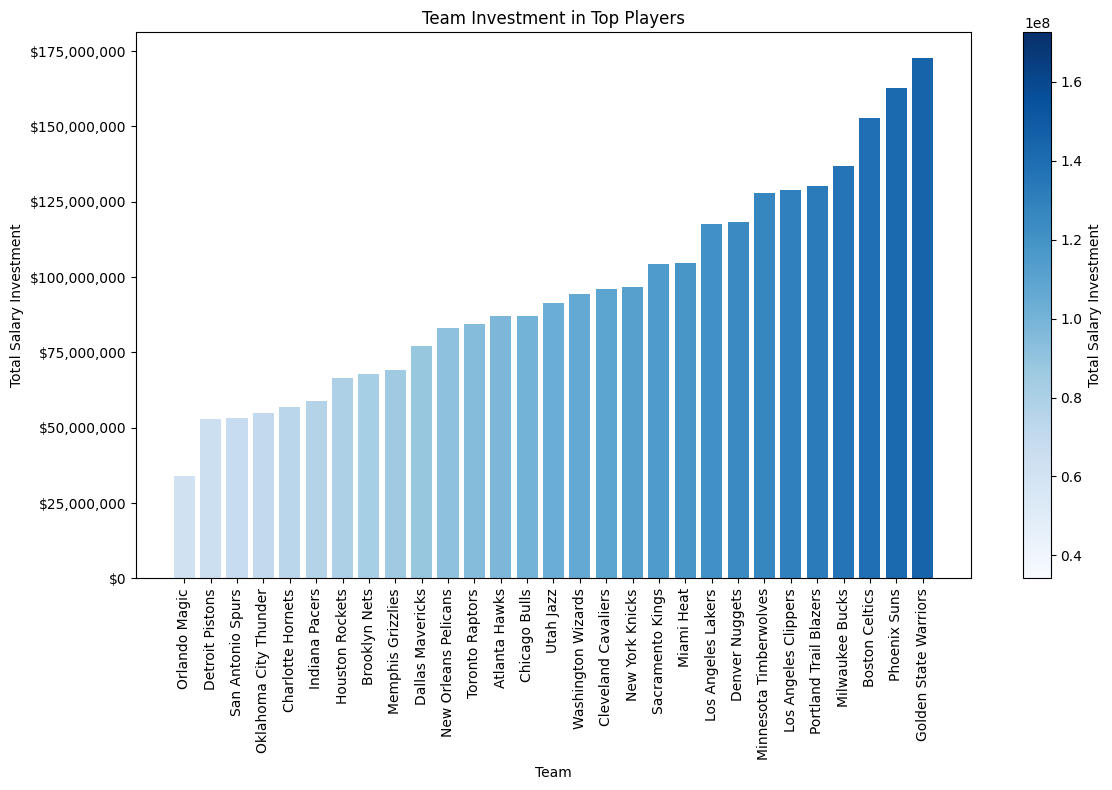

In [283]:
# 8. Create a digrame 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

# Read the merged CSV files into DataFrames
df_merged_table = pd.read_csv("merged_table.csv")
df_merged_team_data = pd.read_csv("merged_team_salary_Conf.csv")

# Function to convert salary strings to numeric values
def convert_salary(salary):
    salary = salary.replace("$", "").replace(",", "")
    return int(salary)

# Convert the "Salary in 2023/24" column to numeric
df_merged_table["Salary in 2023/24"] = df_merged_table["Salary in 2023/24"].apply(convert_salary)

# Group the data by team and sum up the payroll
team_payrolls = df_merged_table.groupby("current_team")["Salary in 2023/24"].sum()

# Merge the team payrolls with the team data
team_investment = df_merged_team_data.merge(team_payrolls, left_on="Team_Name", right_index=True)

# Sort teams by total salary investment
team_investment_sorted = team_investment.sort_values(by="Salary in 2023/24", ascending=True)  # Ascending order

# Create a gradient of colors from deep blue to light blue
colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(team_investment_sorted)))

# Create a bar chart with custom colors
plt.figure(figsize=(12, 8))
bars = plt.bar(team_investment_sorted["Team_Name"], team_investment_sorted["Salary in 2023/24"], color=colors)

plt.xlabel("Team")
plt.ylabel("Total Salary Investment")
plt.title("Team Investment in Top Players")
plt.xticks(rotation=90)

# Format y-axis labels with commas and dollars
def currency_formatter(x, pos):
    return "${:,}".format(int(x))

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

# Add legend for the gradient of colors
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(team_investment_sorted["Salary in 2023/24"]), vmax=max(team_investment_sorted["Salary in 2023/24"])))
sm.set_array([])  # Empty array for the data range
plt.colorbar(sm, label="Total Salary Investment")

plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

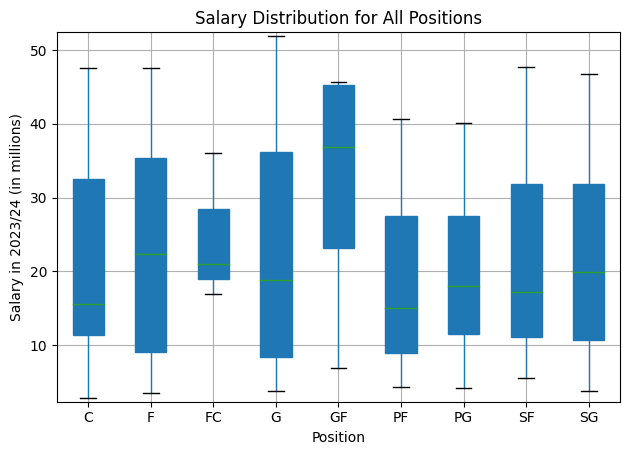

In [284]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the merged CSV file into a DataFrame
df_merged_table = pd.read_csv("merged_table.csv")

# Convert the "Salary in 2023/24" column to numeric using the convert_salary function
df_merged_table.loc[:, "Salary in 2023/24"] = df_merged_table["Salary in 2023/24"].apply(convert_salary)

# Convert salary to millions
df_merged_table["Salary in 2023/24"] = df_merged_table["Salary in 2023/24"] / 1e6

# Create a box plot for all positions
plt.figure(figsize=(10, 6))
box_plot = df_merged_table.boxplot(column="Salary in 2023/24", by="position", vert=True, patch_artist=True)

plt.title("Salary Distribution for All Positions")
plt.suptitle("")  # Remove the default title added by pandas
plt.xlabel("Position")
plt.ylabel("Salary in 2023/24 (in millions)")

# Set the y-axis limits to cover the salary range
min_salary = df_merged_table["Salary in 2023/24"].min()
max_salary = df_merged_table["Salary in 2023/24"].max()
plt.ylim(min_salary - 0.5, max_salary + 0.5)

plt.tight_layout()

# Show the plot
plt.show()


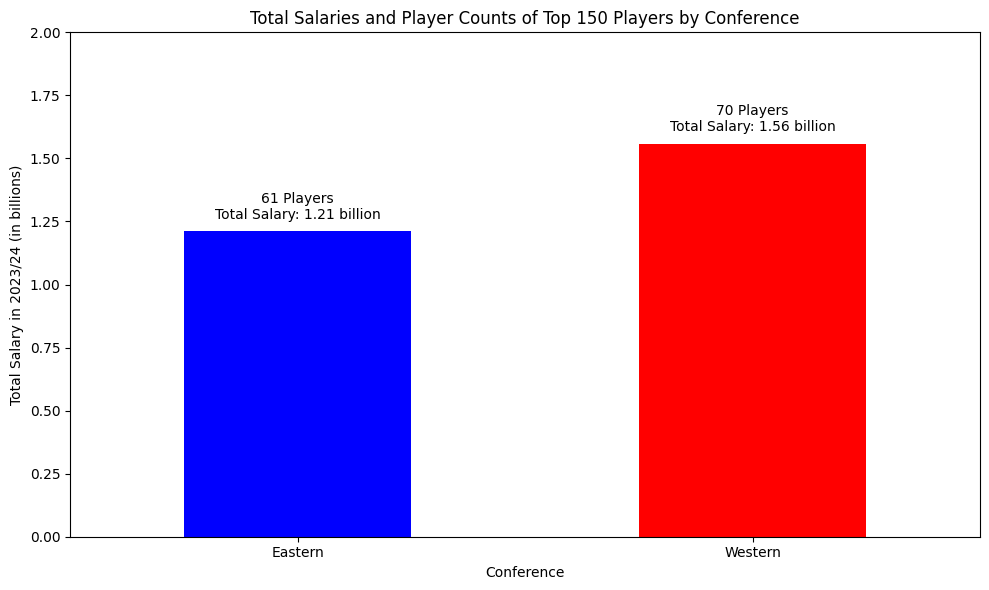

In [285]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the merged CSV files into DataFrames
df_merged_table = pd.read_csv("merged_table.csv")
df_merged_team_data = pd.read_csv("merged_team_salary_Conf.csv")

# Merge the dataframes based on current_team and Team_Name
merged_data = df_merged_table.merge(df_merged_team_data, left_on="current_team", right_on="Team_Name")

# Preprocess the "Salary in 2023/24" column to remove non-numeric characters
merged_data["Salary in 2023/24"] = merged_data["Salary in 2023/24"].str.replace('[\$,]', '', regex=True).astype(float)

# Convert salary to billions
merged_data["Salary in 2023/24"] = merged_data["Salary in 2023/24"] / 1e9

# Group the merged data by Conference and calculate the total salary and player count
conference_stats = merged_data.groupby("Conference").agg({
    "Salary in 2023/24": "sum",
    "Player_name": "count"
})

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = conference_stats["Salary in 2023/24"].plot(kind="bar", color=['blue', 'red'])

# Annotate bars with player counts and total salary
for i, (count, total_salary) in enumerate(zip(conference_stats["Player_name"], conference_stats["Salary in 2023/24"])):
    ax.annotate(f"{count} Players\nTotal Salary: {total_salary:.2f} billion", (i, total_salary + 0.05),
                ha="center", fontsize=10, color="black")

plt.title("Total Salaries and Player Counts of Top 150 Players by Conference")
plt.xlabel("Conference")
plt.ylabel("Total Salary in 2023/24 (in billions)")
plt.xticks(rotation=0)

# Set the y-axis limits to cover the salary range
plt.ylim(0, 2.0)

plt.tight_layout()

# Show the plot
plt.show()
